In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurements = Base.classes.measurement
Stations = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(Measurements.date).order_by(Measurements.date.desc()).first()

('2017-08-23',)

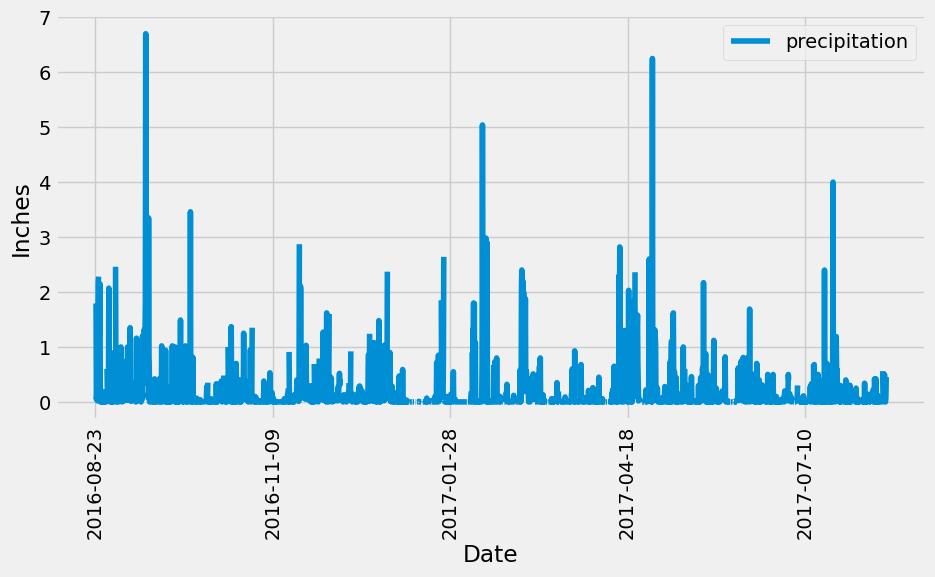

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database.
most_recent_date = dt.date(2017, 8, 23)

# Calculate the date one year from the last date in data set.
first_date = most_recent_date - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precip_data = session.query(Measurements.date, Measurements.prcp).\
    filter(Measurements.date >= first_date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_df = pd.DataFrame(precip_data, columns=['date', 'precipitation'])

# Sort the dataframe by date
precip_df = precip_df.sort_values(by = 'date')

# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot('date', 'precipitation',figsize=(10,5))
plt.xlabel('Date')
plt.ylabel('Inches')
plt.xticks(rotation=90)
plt.show()

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
session.query(Stations).group_by(Stations.station).count()

9

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(Measurements.station, func.count(Measurements.station)).\
        group_by(Measurements.station).order_by(func.count(Measurements.station).desc()).all()
                            
                            

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurements.tobs), func.max(Measurements.tobs), func.avg(Measurements.tobs)).\
    filter(Measurements.station == 'USC00519281').first()

(54.0, 85.0, 71.66378066378067)

In [15]:
# Determine the most recent date of observation for the most active station
session.query(Measurements.date).order_by(Measurements.date.desc()).filter(Measurements.station == 'USC00519281').first()

('2017-08-18',)

Text(0, 0.5, 'Frequency')

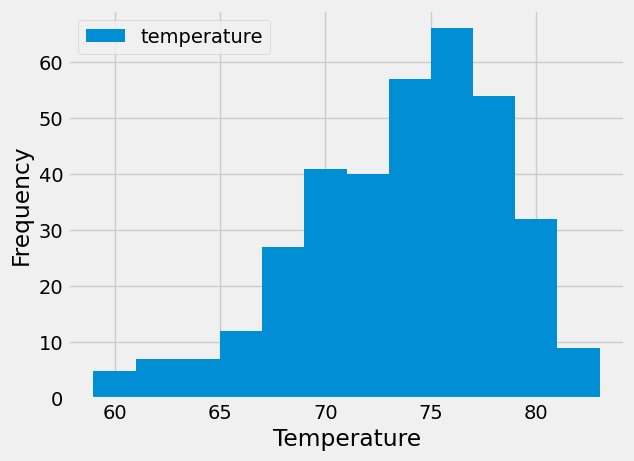

In [16]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# Starting from the most recent data point in the database.
most_recent_date_station = dt.date(2017, 8, 18)

# Calculate the date one year from the last date in data set.
first_date_station = most_recent_date_station - dt.timedelta(days=365)

# Perform a query to retrieve the temperature scores
station_data = session.query(Measurements.tobs).\
    filter(Measurements.date >= first_date_station).\
    filter(Measurements.station == 'USC00519281').all()

# Put those scores in a Pandas DataFrame
station_df = pd.DataFrame(station_data,columns=['temperature'])

# Plot the histogram
station_df.plot.hist(bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')

# Close Session

In [17]:
# Close Session
session.close()